<a href="https://colab.research.google.com/github/shiernee/Getting_Started_with_AI_Tutorial/blob/main/AI_Workshop_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1: Boston Housing Price Prediction with Feed Forward Neural Networks

Let's start with using a fully-connected neural network to do predict housing prices. 

For the Boston housing dataset, we get 506 rows of data, with 13 features in each. Our task is to build a regression model that takes these 13 features as input and output a single value prediction of the "median value of owner-occupied homes (in $1000)."

Now, we load the dataset. Loading the dataset returns four NumPy arrays:

* The `train_data` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_data`, and `test_labels` arrays.

## 1. Import Data

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

#A bunch is you remember is a dictionary based dataset.  Dictionaries are addressed by keys. 
#Let's look at the keys. 
print(boston.keys())


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [ ]:
#DESCR sounds like it could be useful. Let's print the description.
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# 2. Data Splitting


In [ ]:
from tensorflow import keras
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()


65536/57026 [==================================] - 0s 0us/step


### **Exercise**

How many number of samples in train and test datasets respectively.

In [ ]:
# type your code here (hint: len())


In [ ]:
#@title Solution
print('train_features: ', len(train_features))
print('test_features: ', len(test_features))


train_features:  404
test_features:  102


### 3. Build the model

Building the neural network requires configuring the layers of the model, then compiling the model. First we stack a few layers together using `keras.Sequential`. Next we configure the loss function, optimizer, and metrics to monitor. These are added during the model's compile step:

* *Loss function* - measures how accurate the model is during training, we want to minimize this with the optimizer.
* *Optimizer* - how the model is updated based on the data it sees and its loss function.
* *Metrics* - used to monitor the training and testing steps.

Let's build a network with 1 hidden layer of 20 neurons, and use mean squared error (MSE) as the loss function (most common one for regression problems):

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

def build_model():
    model = keras.Sequential([
        Dense(20, activation=tf.nn.relu, input_shape=[len(train_features[0])]),
        Dense(1)
    ])

    model.compile(optimizer=tf.optimizers.Adam(), 
                  loss='mse',
                  metrics=['mse'])
    return model


model = build_model()

### 4. Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_features` and `train_labels` arrays.
2. The model learns to associate features and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_features` array. We verify that the predictions match the labels from the `test_labels` array. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [ ]:
import pandas as pd
import numpy as np

# this helps makes our output less verbose but still shows progress
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show RMSE measure to compare to Kaggle leaderboard on https://www.kaggle.com/c/boston-housing/leaderboard
rmse_final = np.sqrt(float(hist['val_mse'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))


....................................................................................................
........................................
Final Root Mean Square Error on validation set: 4.988


Now, let's plot the loss function measure on the training and validation sets. The validation set is used to prevent overfitting ([learn more about it here](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)). However, because our network is small, the training convergence without noticeably overfitting the data as the plot shows.

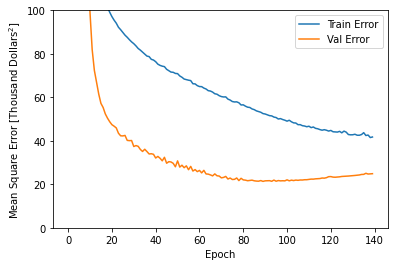

In [ ]:
import matplotlib.pyplot as plt

def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    plt.ylim([0,100])

plot_history()

## 5. Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
_, mse = model.evaluate(test_features, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))


4/4 [==============================] - 0s 3ms/step - loss: 43.7727 - mse: 43.7727
Root Mean Square Error on test set: 6.616


# **Part 2. Design simple ANN model to predict SGA baby**
## Classification of Normal vs. Small baby

Task: Create a ANN model to predict the normal / small baby based on the second trimesters data. 

**Features:**
1. Age
2. Ethnics
3. Head Circumference
4. Abdominal Circumference 
2. Femur 

**Label:**
1. Labels


In [ ]:
# type your code here


# Solutions
Please try to do it yourself first. 

### Step1: Import data
 

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/shiernee/AI_Tutorial/main/fetal_dataset.csv'
data = pd.read_csv(url, delimiter=',')
data

,ID,Gender,"labels (0-healthy, 1-SGA)",Age,Ethnics,HC,AC,FL
0,1,1,0,30,1,193.9,170.7,35.5
1,2,2,0,31,1,186.0,162.4,36.3
2,3,1,0,26,1,186.0,166.0,34.7
3,4,2,0,31,1,195.0,163.8,35.2
4,5,1,0,27,4,192.1,159.8,35.0
...,...,...,...,...,...,...,...,...
342,343,2,0,29,2,172.5,163.0,34.2
343,344,1,0,31,2,188.0,163.7,38.9
344,345,2,0,33,2,194.6,173.8,36.7
345,346,1,0,29,3,221.1,199.1,40.5


In [ ]:
X = data[['Age', 'Ethnics', 'HC', 'AC', 'FL']]
y = data['labels (0-healthy, 1-SGA)']
print(y)

### Normalize your data (Optional)

In [ ]:
import numpy as np
# get per-feature statistics (mean, standard deviation) from the training set to normalize by
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_features = (X - X_mean) / X_std
print(X_features)

## Step2: Data Splitting. 
Refer to this. <br> 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [ ]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(X_features, y, test_size=0.33, random_state=42)

print(len(X_features))
print(len(train_features))
print(len(test_features))

347
232
115


## Step3: Build Model 


In [ ]:
# 5 things to changes: 
# (i) input dim, (ii) last layer is 2 nodes, (iii) add softmax activation in last layer
#(iv) change loss and metrics to 'sparse_categorical_crossentropy' and 'accuracy'

input_dim = int(train_features.size/train_features.shape[0]) 

def build_model():
    model = keras.Sequential([
        Dense(20, activation=tf.nn.relu, input_shape=[input_dim]),
        # output a softmax to squash the matrix into output probabilities
        Dense(2, activation='softmax')
    ])

    model.compile(optimizer=tf.optimizers.Adam(), 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


model = build_model()


## Step4: Train Model


In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(train_features, train_labels, epochs=1000, verbose=0, validation_split = 0.1,
                    callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch


# show accuracy measure 
train_acc = float(hist['accuracy'].tail(1))
val_acc = float(hist['val_accuracy'].tail(1))
print()
print('Train accuracy:', train_acc)
print('Validation accuracy:', val_acc)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
................
Train accuracy: 0.7259615659713745
Validation accuracy: 0.625


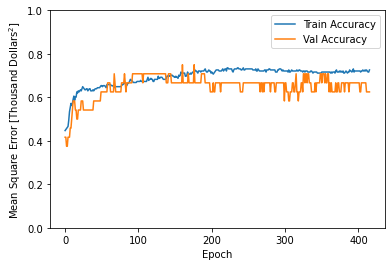

In [ ]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    plt.legend()
    plt.ylim([0,1])

plot_history()

As the model trains, the loss and accuracy metrics are displayed. This model reaches an training accuracy of about 71% and validation accuracy 62% on the training data.

## 5. Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
test_loss, test_acc = model.evaluate(test_features, test_labels)

print('Test accuracy:', test_acc)

4/4 [==============================] - 0s 3ms/step - loss: 0.7087 - accuracy: 0.6174
Test accuracy: 0.6173912882804871


Often times, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of *overfitting*. 

## Acknowledgements

The contents of the Part 1: Regression tutorial is inspired and based on Lex Friedman's [tutorial_deep_learning_basic.ipynb](https://colab.research.google.com/github/lexfridman/mit-deep-learning/blob/master/tutorial_deep_learning_basics/deep_learning_basics.ipynb#scrollTo=IysPmcOBHBE9) 
